# ZOMATO DATA ANALYSIS PROJECT

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv(r"C:\Users\HP\Downloads\Zomato data .csv")
df.head(10)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
5,Timepass Dinner,Yes,No,3.8/5,286,600,Buffet
6,Rosewood International Hotel - Bar & Restaurant,No,No,3.6/5,8,800,Buffet
7,Onesta,Yes,Yes,4.6/5,2556,600,Cafes
8,Penthouse Cafe,Yes,No,4.0/5,324,700,other
9,Smacznego,Yes,No,4.2/5,504,550,Cafes


In [16]:
df.dtypes

name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
approx_cost(for two people)     int64
listed_in(type)                object
dtype: object

In [22]:
#Removing /5 from Rate column

def handleRate(value):
    value = str(value).split('/')
    value = value[0]
    return float(value)

df['rate'] = df['rate'].apply(handleRate)
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3,0,100,Dining
144,New Indraprasta,No,No,3.3,0,150,Dining
145,Anna Kuteera,Yes,No,4.0,771,450,Dining
146,Darbar,No,No,3.0,98,800,Dining


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


In [24]:
df.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

What type of restaurant makes maximum orders

In [28]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Text(0, 0.5, 'No. of Orders')

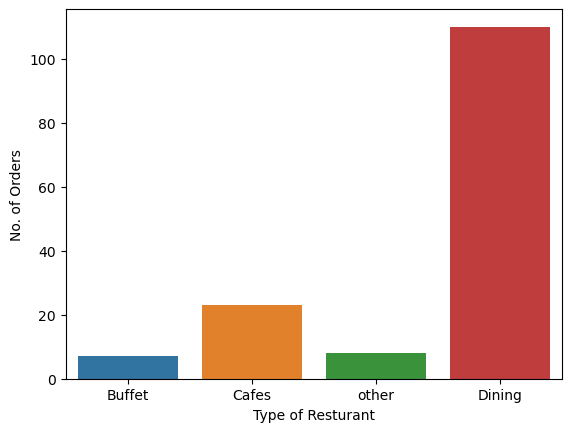

In [36]:
sns.countplot(data = df, x='listed_in(type)')
plt.xlabel('Type of Resturant')
plt.ylabel('No. of Orders')

Conclusion - Majority of restaurant falls under the category of Dining.

In [38]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [46]:
votes_df = df.groupby(['listed_in(type)'])['votes'].sum().reset_index()
votes_df

,listed_in(type),votes
0,Buffet,3028
1,Cafes,6434
2,Dining,20363
3,other,9367


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'No. of Votes')

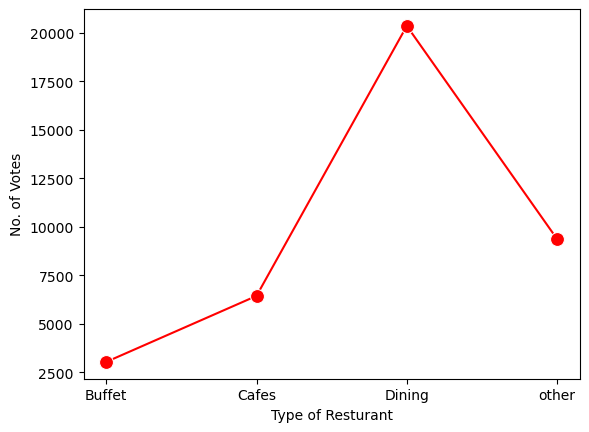

In [72]:
sns.lineplot(data = votes_df, x='listed_in(type)',y='votes', marker = 'o', markerfacecolor='red',markersize = 10, color='red')
#sns.lineplot(data = votes_df, x='listed_in(type)',y='votes').set(title = 'votes data',xlabel= 'types',ylabel='votes')
plt.xlabel('Type of Resturant', c='black',size=10)
plt.ylabel('No. of Votes', c='black',size=10)

Conclusion - Dining Restaurants recieved maximum votes.

In [74]:
df.head(10)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet
5,Timepass Dinner,Yes,No,3.8,286,600,Buffet
6,Rosewood International Hotel - Bar & Restaurant,No,No,3.6,8,800,Buffet
7,Onesta,Yes,Yes,4.6,2556,600,Cafes
8,Penthouse Cafe,Yes,No,4.0,324,700,other
9,Smacznego,Yes,No,4.2,504,550,Cafes


C:\Users\HP\AppData\Local\Temp\ipykernel_13696\50785862.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = df['rate'], bins =5, color= 'green').set(title='Rating Distribution')
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[Text(0.5, 1.0, 'Rating Distribution')]

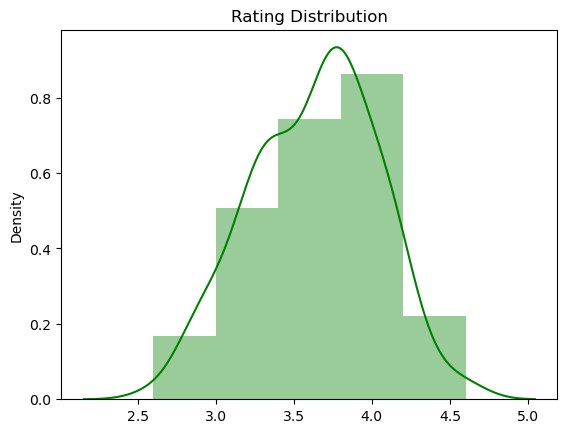

In [84]:
sns.distplot(x = df['rate'], bins =5, color= 'green').set(title='Rating Distribution')

Conclusion - Majority Restaurants received ratings between 3.5 to 4

In [86]:
df.head(10)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet
5,Timepass Dinner,Yes,No,3.8,286,600,Buffet
6,Rosewood International Hotel - Bar & Restaurant,No,No,3.6,8,800,Buffet
7,Onesta,Yes,Yes,4.6,2556,600,Cafes
8,Penthouse Cafe,Yes,No,4.0,324,700,other
9,Smacznego,Yes,No,4.2,504,550,Cafes


[Text(0.5, 0, 'Amount'), Text(0, 0.5, 'Count of Orders')]

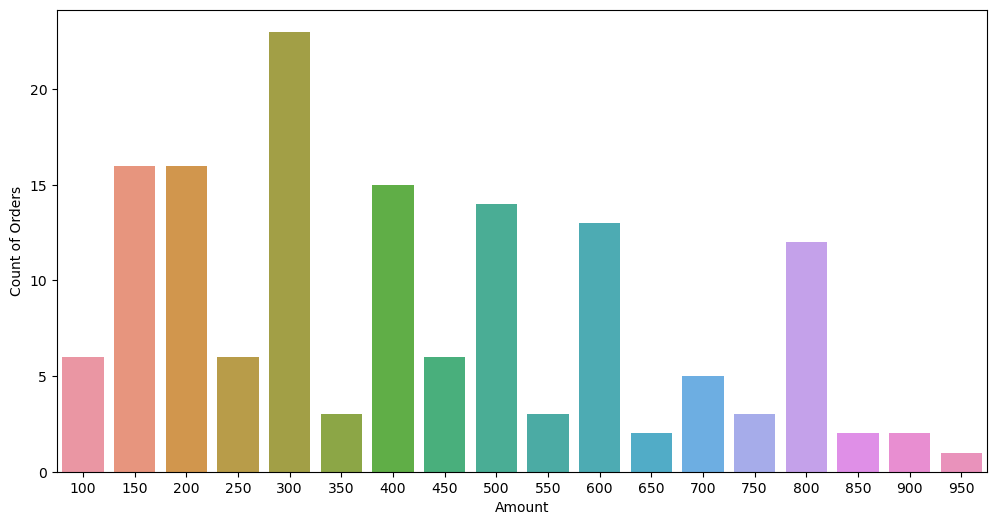

In [98]:
plt.figure(figsize=(12,6))
sns.countplot(data= df ,x='approx_cost(for two people)').set(xlabel='Amount',ylabel='Count of Orders')

Conclusion - Majority of couples prefer to spend 300 rs on eah other

[Text(0.5, 0, 'Online Orders'), Text(0, 0.5, 'Ratings')]

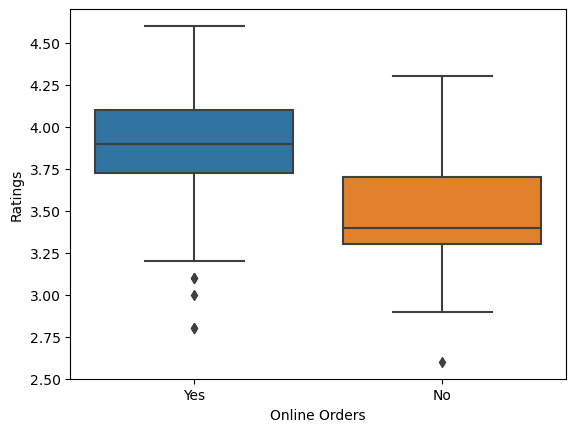

In [104]:
sns.boxplot(data=df, x='online_order',y='rate').set(xlabel='Online Orders', ylabel='Ratings')

Conclusion - Online Orders recieve maximum ratings as compared to offline orders.

In [110]:
sns.countplot(data=df,x='listed_in(type)',hue='online_order',ax=ax1)
for i in ax1.containers:
    ax1.bar_label(i,)

NameError: name 'ax1' is not defined

In [114]:
pivot_table=df.pivot_table(index='listed_in(type)',columns='online_order',aggfunc='size',fill_value=0)
pivot_table

online_order,No,Yes
listed_in(type),,
Buffet,3,4
Cafes,8,15
Dining,77,33
other,2,6


<Axes: xlabel='online_order', ylabel='listed_in(type)'>

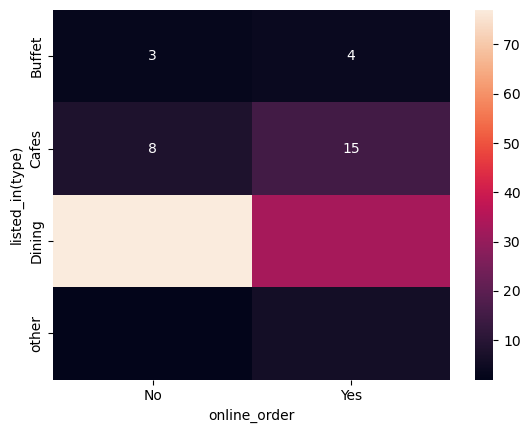

In [130]:
sns.heatmap(pivot_table,annot=True)